# Import libraries and Loading the Data

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score,  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/superstore-sales-dataset/Superstore Sales Dataset.csv


# Reading the Data

In [143]:
df = pd.read_csv('/kaggle/input/superstore-sales-dataset/Superstore Sales Dataset.csv')

# EDA and Understanding the Data

In [144]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [145]:
df.shape

(9800, 18)

In [146]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [148]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [149]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [150]:
# Define the features (columns) you're interested in
selected_features = ['Category', 'Region', 'Sub-Category', 'Segment', 'Ship Mode', 'Country', 'State']

# Loop through only those features and print unique values
for col in selected_features:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 50)  # Separator for readability

Unique values in column 'Category':
['Furniture' 'Office Supplies' 'Technology']
--------------------------------------------------
Unique values in column 'Region':
['South' 'West' 'Central' 'East']
--------------------------------------------------
Unique values in column 'Sub-Category':
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
--------------------------------------------------
Unique values in column 'Segment':
['Consumer' 'Corporate' 'Home Office']
--------------------------------------------------
Unique values in column 'Ship Mode':
['Second Class' 'Standard Class' 'First Class' 'Same Day']
--------------------------------------------------
Unique values in column 'Country':
['United States']
--------------------------------------------------
Unique values in column 'State':
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' '

In [151]:
sum_sales_per_Furniture = df[df['Category'] == 'Furniture']['Sales'].sum()
print(f"Sum of 'Sales' where 'Category' is 'Furniture': {sum_sales_per_Furniture}")

sum_sales_per_Office_Supplies = df[df['Category'] == 'Office Supplies']['Sales'].sum()
print(f"Sum of 'Sales' where 'Category' is 'Office Supplies': {sum_sales_per_Office_Supplies}")

sum_sales_per_Technology = df[df['Category'] == 'Technology']['Sales'].sum()
print(f"Sum of 'Sales' where 'Category' is 'Technology': {sum_sales_per_Technology}")

sum_Orders_per_Furniture = df[df['Category'] == 'Furniture']['Order ID'].count()
print(f"Sum of 'Sales' where 'Category' is 'Furniture': {sum_Orders_per_Furniture}")

sum_Orders_per_Office_Supplies = df[df['Category'] == 'Office Supplies']['Order ID'].count()
print(f"Sum of 'Sales' where 'Category' is 'Office Supplies': {sum_Orders_per_Office_Supplies}")

sum_Orders_per_Technology = df[df['Category'] == 'Technology']['Order ID'].count()
print(f"Sum of 'Sales' where 'Category' is 'Technology': {sum_Orders_per_Technology}")



sum_sales_per_Region1 = df[df['Region'] == 'East']['Sales'].sum()
print(f"Sum of 'Sales' where 'Category' is 'East': {sum_sales_per_Region1}")

sum_sales_per_Region2 = df[df['Region'] == 'South']['Sales'].sum()
print(f"Sum of 'Sales' where 'Category' is 'South': {sum_sales_per_Region2}")

sum_sales_per_Region3 = df[df['Region'] == 'West']['Sales'].sum()
print(f"Sum of 'Sales' where 'Category' is 'West': {sum_sales_per_Region3}")

sum_sales_per_Region4 = df[df['Region'] == 'Central']['Sales'].sum()
print(f"Sum of 'Sales' where 'Category' is 'Central': {sum_sales_per_Region4}")

Sum of 'Sales' where 'Category' is 'Furniture': 728658.5757
Sum of 'Sales' where 'Category' is 'Office Supplies': 705422.334
Sum of 'Sales' where 'Category' is 'Technology': 827455.873
Sum of 'Sales' where 'Category' is 'Furniture': 2078
Sum of 'Sales' where 'Category' is 'Office Supplies': 5909
Sum of 'Sales' where 'Category' is 'Technology': 1813
Sum of 'Sales' where 'Category' is 'East': 669518.726
Sum of 'Sales' where 'Category' is 'South': 389151.45900000003
Sum of 'Sales' where 'Category' is 'West': 710219.6845
Sum of 'Sales' where 'Category' is 'Central': 492646.91320000007


# Data Visualization

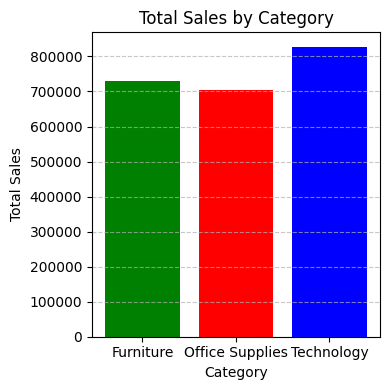

In [152]:
data = {
    'Category': ['Furniture', 'Office Supplies', 'Technology'],
    'Total Sales': [sum_sales_per_Furniture, sum_sales_per_Office_Supplies, sum_sales_per_Technology]
}
sales_summary = pd.DataFrame(data)

plt.figure(figsize=(4, 4))
plt.bar(sales_summary['Category'], sales_summary['Total Sales'], color=['Green', 'Red', 'Blue'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

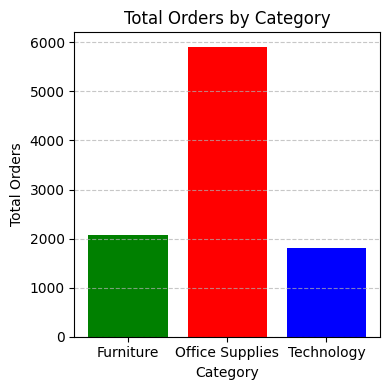

In [153]:
data = {
    'Category': ['Furniture', 'Office Supplies', 'Technology'],
    'Total Orders': [sum_Orders_per_Furniture, sum_Orders_per_Office_Supplies, sum_Orders_per_Technology]
}
sales_summary = pd.DataFrame(data)

plt.figure(figsize=(4, 4))
plt.bar(sales_summary['Category'], sales_summary['Total Orders'], color=['Green', 'Red', 'Blue'])
plt.title('Total Orders by Category')
plt.xlabel('Category')
plt.ylabel('Total Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

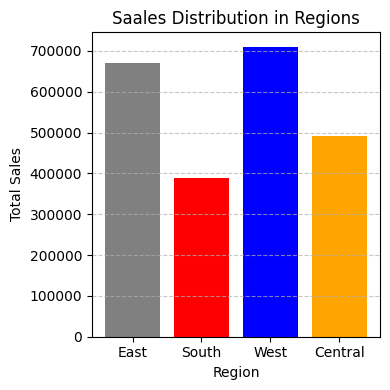

In [154]:
data = {
    'Region': ['East', 'South', 'West', 'Central'],
    'Total Sales': [sum_sales_per_Region1, sum_sales_per_Region2, sum_sales_per_Region3, sum_sales_per_Region4]
}
sales_summary = pd.DataFrame(data)

plt.figure(figsize=(4, 4))
plt.bar(sales_summary['Region'], sales_summary['Total Sales'], color=['gray', 'Red', 'Blue', 'Orange'])
plt.title('Saales Distribution in Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

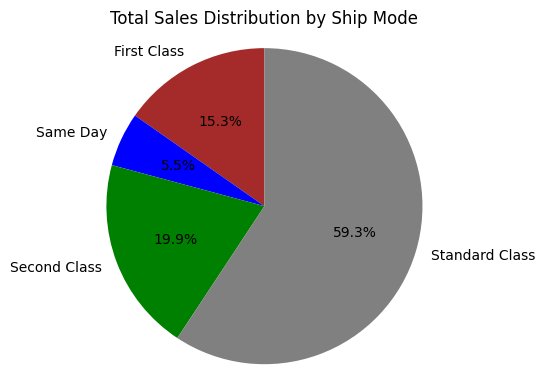

In [155]:
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum()

plt.figure(figsize=(5, 4))
plt.pie(sales_by_ship_mode, labels=sales_by_ship_mode.index, autopct='%1.1f%%', startangle=90, 
        colors=['brown', 'blue', 'green', 'gray'])

plt.title('Total Sales Distribution by Ship Mode')
plt.axis('equal')
plt.tight_layout()

plt.show()

# Data Preprocessing and Transformation

In [156]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Year'] = df['Order Date'].dt.year

print(df[['Order Date', 'Year']].head())

  Order Date  Year
0 2017-11-08  2017
1 2017-11-08  2017
2 2017-06-12  2017
3 2016-10-11  2016
4 2016-10-11  2016


In [157]:
print(df['Year'].nunique())

4


In [158]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month Year Date'] = df['Order Date'].dt.strftime('%m-%Y')
print(df[['Order Date', 'Month Year Date']].head())

  Order Date Month Year Date
0 2017-11-08         11-2017
1 2017-11-08         11-2017
2 2017-06-12         06-2017
3 2016-10-11         10-2016
4 2016-10-11         10-2016


In [159]:
columns_to_drop =['Order ID', 'Category', 'Row ID','Customer ID', 'Customer Name','Country','Region','Segment','Ship Mode','Ship Date','City','State','Postal Code','Product ID','Product Name','Sub-Category']
df.drop(columns=columns_to_drop ,inplace=True)

In [160]:
df.head()

,Order Date,Sales,Year,Month Year Date
0,2017-11-08,261.9600,2017,11-2017
1,2017-11-08,731.9400,2017,11-2017
2,2017-06-12,14.6200,2017,06-2017
3,2016-10-11,957.5775,2016,10-2016
4,2016-10-11,22.3680,2016,10-2016


# Prediction using Linear Regression

In [161]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date').reset_index(drop=True)
df['Months_Since_Start'] = (df['Order Date'].dt.year - df['Order Date'].dt.year.min()) * 12 + \
                           (df['Order Date'].dt.month - df['Order Date'].dt.month.min())

X = df[['Months_Since_Start']]
y = df['Sales']

In [162]:
test_month = df['Months_Since_Start'].max()  # Keep last month for testing
train_mask = df['Months_Since_Start'] < test_month

X_train = df.loc[train_mask, ['Months_Since_Start']]
y_train = df.loc[train_mask, 'Sales']

X_test = df.loc[~train_mask, ['Months_Since_Start']]
y_test = df.loc[~train_mask, 'Sales']

In [163]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Prediction the next month

In [164]:
next_month_number = np.array([[test_month]])
predicted_sales = model.predict(next_month_number)[0]

print(f"Predicted Sales for Next Month: ${predicted_sales:.2f}")

Predicted Sales for Next Month: $228.20


# Evaluate the performance on training data

In [165]:
y_pred_train = model.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)

relative_errors = np.abs((model.predict(X_train) - y_train) / y_train)
accuracy_10percent = np.mean(relative_errors <= 0.10)

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"% of Predictions Within ±10% of Actual: {accuracy_10percent * 100:.2f}%")


Model Performance:
R² Score: 0.0000
Mean Absolute Error (MAE): $272.58
% of Predictions Within ±10% of Actual: 3.39%


# Prediction using Random Forest

In [166]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy_10p = np.mean(np.abs((y_pred - y_test) / y_test) <= 0.10)

print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:.2f}")
print(f"% Within ±10%: {accuracy_10p * 100:.2f}%")

R² Score: -0.0599
MAE: $249.60
% Within ±10%: 3.27%
